# Bank Marketing Data Set 

In [2]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
# Load Data
data = pd.read_csv("D:\\Datasets\\Bank Marketing\\bank-additional-full.csv",delimiter=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Label Encoding for Target Variable

In [4]:
c_y = {"y": {"yes": 1, "no": 0}}
data.replace(c_y, inplace=True)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


# Spliting Target Variable

In [5]:
predictor= data.iloc[:, data.columns != 'y']
target= data.iloc[:, data.columns == 'y']

# One Hot Encoding for Categorical Variables

In [6]:
# save all categorical columns in list
categorical_columns = [col for col in predictor.columns.values if predictor[col].dtype == 'object']

# dataframe with categorical features
data_cat = predictor[categorical_columns]
# dataframe with numerical features
data_num = predictor.drop(categorical_columns, axis=1)

In [7]:
# Using pandas.get_dummies function to Convert categorical variable into dummy/indicator variables
data_cat_dummies  = pd.get_dummies(data_cat,drop_first=True)

In [8]:
# using concat function we merging two dataframe for furthere analysis
predictor = pd.concat([data_num, data_cat_dummies], axis=1)

In [9]:
predictor.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


# Spliting Dataset into Train & Test

In [10]:
#Let us now split the dataset into train & test
from sklearn.cross_validation import train_test_split
x_train,x_test, y_train, y_test = train_test_split(predictor, target, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (28831, 53)
x_test  (12357, 53)
y_train  (28831, 1)
y_test  (12357, 1)


C:\Users\computer\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Decision Tree Classifier

In [15]:
# Create decision tree classifier object using gini index
clf_DT = DecisionTreeClassifier(criterion='gini', random_state=0)

In [16]:
# Train model
model_DT = clf_DT.fit(x_train,y_train)

# Predicting the model
y_pred_DT = model_DT.predict(x_test)

ROC Curve for Decision Tree Classifier

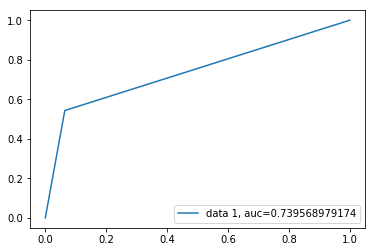

In [17]:
y_pred_proba = model_DT.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [18]:
tmp2 = pd.Series({'Model': " Decision Tree with GINI ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_DT),
                 'Precision Score': metrics.precision_score(y_test, y_pred_DT),
                 'Recall Score': metrics.recall_score(y_test, y_pred_DT),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_DT),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_DT)})

model_dt1_report = models_report.append(tmp2, ignore_index = True)
model_dt1_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Decision Tree with GINI,0.739569,0.517502,0.543228,0.891802,0.468957


# Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
# Create random tree classifer object
clf_RF = RandomForestClassifier(random_state=0, n_jobs=-1)

In [20]:
# Train model
model_RF = clf_RF.fit(x_train,y_train)

# Predicting the model
y_pred_RF = model_RF.predict(x_test)

C:\Users\computer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ROC Curve of Random Forest Classifier

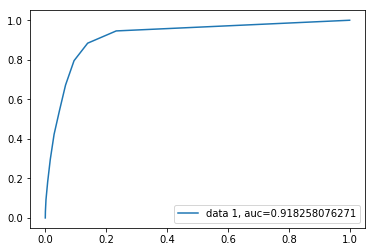

In [21]:
y_pred_proba = model_RF.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [22]:
tmp3 = pd.Series({'Model': " Random Forest Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_RF),
                 'Precision Score': metrics.precision_score(y_test, y_pred_RF),
                 'Recall Score': metrics.recall_score(y_test, y_pred_RF),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_RF),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_RF)})

model_rf1_report = models_report.append(tmp3, ignore_index = True)
model_rf1_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Random Forest Classifier,0.697006,0.649336,0.422911,0.909525,0.464794


# Feature Importance

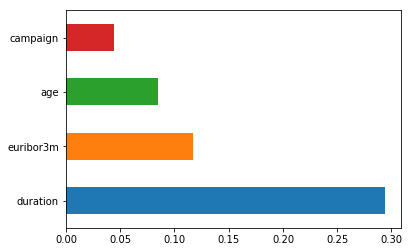

In [26]:
(pd.Series(model_RF.feature_importances_, index=predictor.columns)
   .nlargest(4)
   .plot(kind='barh')) 

Based on Random Forest Model the important variables are duration, euribor3m, age and campaign

# Tuning the hyper-parameters of an estimator
Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. For example "Number of features", "regularization" as hyperparameter.

# GridSearchCV

GridSearchCV shows how a classifier is optimized by cross-validation.

When the grid search is called with various parameters, it chooses the one with the highest score based on the given Random Forest model. 'best_params_' gives the information of the parameters that resulted in the highest score. 

In [23]:
# set of parameters to test
param_grid = {'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10],'max_features': ['auto', 'sqrt', 'log2']}

In [24]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=model_RF, param_grid=param_grid, cv= 5)

In [25]:
CV_rfc.fit(x_train, y_train)
print(CV_rfc.best_params_)

C:\Users\computer\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\computer\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\computer\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\computer\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column

{'max_features': 'auto', 'n_estimators': 10}


Based on GridSearch the best parameters to consider for 'max_features' is 'auto' and for 'n_estimators' is 10.

# Randomized Search Cross Validation

Using RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold cross validation with each combination of values. "GridSearchCV" exhaustively considers all parameter combinations, while "RandomizedSearchCV" can sample given number of candidates from a parameter space with a specified distribution.

In [27]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 5, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [1, 2, 3, 4, 5], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True]}


In [28]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = model_RF, param_distributions = random_grid,n_iter = 10, cv = 3,random_state=42)
# Fit the random search model
rf_random.fit(x_train, y_train)

C:\Users\computer\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\computer\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\computer\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\computer\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [1, 2, 3, 4, 5], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

We can have a look at the best parameters by fitting the random search:

In [29]:
rf_random.best_params_

{'n_estimators': 1,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 6,
 'bootstrap': True}

In [30]:
print(rf_random.best_score_)
print(rf_random.best_estimator_)

0.901113384898
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


C:\Users\computer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


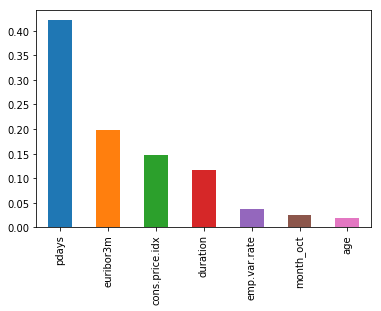

In [31]:
best_model = rf_random.best_estimator_
best_model.fit(x_train, y_train)

importance = sorted(zip(map(lambda x: round(x, 4), best_model.feature_importances_), predictor.columns),reverse=True)

y_val = []
x_val = [x[0] for x in importance]

for x in importance:
    y_val.append(x[1])
    
pd.Series(x_val,index=y_val)[:7].plot(kind='bar')
plt.show()

Based on random search model the important variables are pdays, euribor3m, cons.price.idx, duration, month_oct and age

# Bagging Classifier


BaggingClassifier is a Sci-kit learn's implementation of bagging ensemble which accepts as an input the designation of a base classifier which the bagging ensemble will replicate n times.These methods are used as a way to reduce the variance of a base estimator, by introducing randomization into its construction procedure and then making an ensemble out of it.

As they provide a way to reduce overfitting, bagging methods work best with strong and complex models, in contrast with boosting methods which usually work best with weak models.

In [32]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(best_model, random_state=1)
bagging.fit(x_train, y_train)

C:\Users\computer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

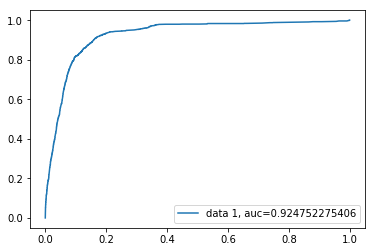

In [33]:
y_pred_proba = bagging.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [34]:
test_pred_bag = bagging.predict(x_test)

tmp2 = pd.Series({'Model': " Random Forest with BaggingClassifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, test_pred_bag),
                 'Precision Score': metrics.precision_score(y_test, test_pred_bag),
                 'Recall Score': metrics.recall_score(y_test, test_pred_bag),
                 'Accuracy Score': metrics.accuracy_score(y_test, test_pred_bag),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, test_pred_bag)})

model_bag_report = models_report.append(tmp2, ignore_index = True)
model_bag_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Random Forest with BaggingClassifier,0.604797,0.69526,0.221902,0.901675,0.298288
